<a href="https://colab.research.google.com/github/danisshai/fastai-tests/blob/main/notebooks/mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! [ -e /content ] && pip install -Uqq fastbook


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.1 MB/s eta 0:00:00


In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)

In [26]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [30]:
im3_path = threes[1000]
im3 = Image.open(im3_path)
im3

In [36]:
tensor(im3)[:10,10:11]

tensor([[  0],
        [  0],
        [  0],
        [ 19],
        [226],
        [253],
        [183],
        [  0],
        [  0],
        [  0]], dtype=torch.uint8)

In [42]:
#hide_output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt', 'font-style': 'italic'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,140,177,226,253,253,254,253,253,247,102,0,0,0,0
1,0,0,0,0,254,253,253,253,253,205,174,229,253,253,31,0,0,0
2,0,0,0,0,163,234,183,102,19,8,0,13,220,253,188,0,0,0
3,0,0,0,0,36,31,0,0,0,0,0,0,136,253,195,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,137,254,196,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,44,228,253,195,0,0,0
6,0,0,0,0,0,0,25,79,79,79,124,229,253,253,128,0,0,0
7,0,0,0,0,47,182,240,253,253,254,253,253,253,253,23,0,0,0
8,0,0,0,0,156,253,253,253,253,254,245,223,253,253,195,53,0,0
9,0,0,0,0,61,173,98,98,98,99,15,0,68,240,255,238,41,0


In [45]:

three_tensors = [tensor(Image.open(img)) for img in threes]
seven_tensors = [tensor(Image.open(img)) for img in sevens]

In [46]:
len(three_tensors),len(seven_tensors)

(6131, 6265)

<Axes: >

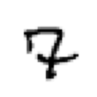

In [50]:
show_image(seven_tensors[2])

In [56]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [58]:
stacked_threes.ndim

3

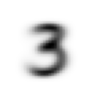

In [65]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

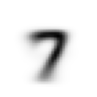

In [66]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

# Very basic classifier

In [93]:
((stacked_threes[1] - mean3).abs()).sum()/(mean3.shape[0]*mean3.shape[1])

tensor(0.1114)

(tensor(0.1114), tensor(0.2021))

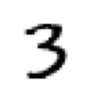

In [95]:
a_3 = stacked_threes[1]
show_image(a_3)
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

In [99]:
import torch.nn.functional as F

In [106]:
F.l1_loss(stacked_threes[1], mean3), F.mse_loss(stacked_threes[1], mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [107]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [120]:
(tensor ( [[1,2,3],[4,5,4]])[1:1]*1.5).type()

'torch.FloatTensor'

In [121]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [139]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(valid_3_tens, mean3).mean()

tensor(0.1296)

In [138]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [143]:
is_3(valid_3_tens).float().mean(), 1- is_3(valid_7_tens).float().mean()

(tensor(0.9168), tensor(0.9854))

In [144]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [170]:
xt = tensor(3.).requires_grad_()

In [171]:
def f(x): return  x**2
z = f(xt)

In [172]:
z.backward()

In [174]:
xt.grad

tensor(6.)

In [176]:
xt = tensor([3.,4.,10.]).requires_grad_()
def f(x): return (x**2).sum()
yt = f(xt)
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [179]:
?torch.randn

# cuadratic function test

In [185]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

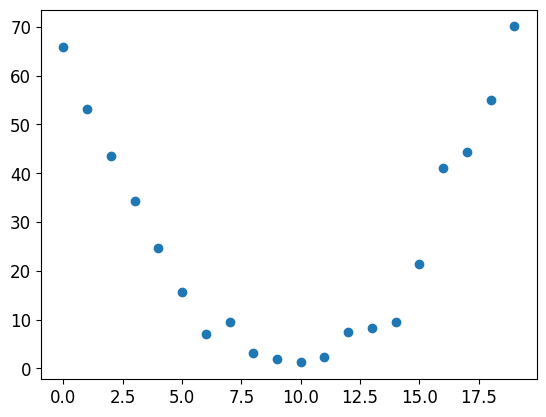

In [186]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [180]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [181]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [183]:
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

In [187]:
preds = f(time, params)

predictions:

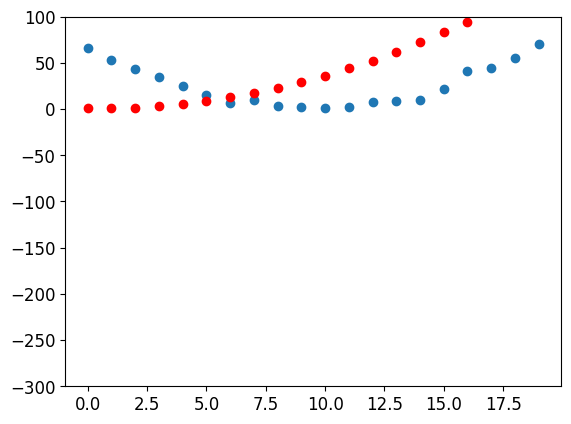

In [206]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
show_preds(preds)

In [190]:
loss = mse(preds, speed)


In [205]:
loss

tensor(8503.1299, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()


In [198]:
params.grad * 1e-5

tensor([0.2979, 0.0191, 0.0011])

In [201]:
lr = 1e-5
params.data -= lr * params.grad.data


In [202]:
params.grad = None

In [204]:
preds = f(time,params)
mse(preds, speed)

tensor(2107.4783, grad_fn=<MeanBackward0>)

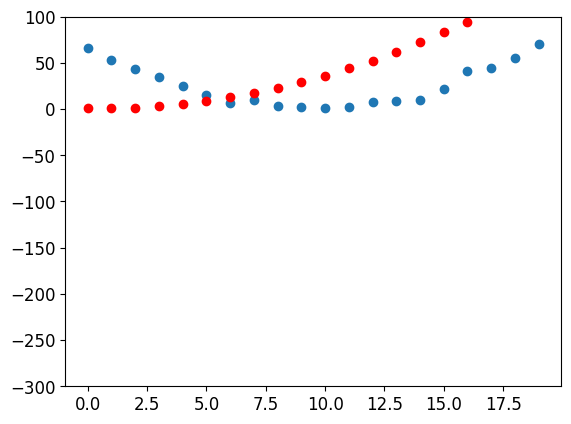

In [207]:
show_preds(preds)

In [208]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [209]:
for i in range(10): apply_step(params)

2107.478271484375
897.2223510742188
668.2022705078125
624.862060546875
616.6581420898438
615.1030883789062
614.80615234375
614.7474365234375
614.7337036132812
614.7284545898438


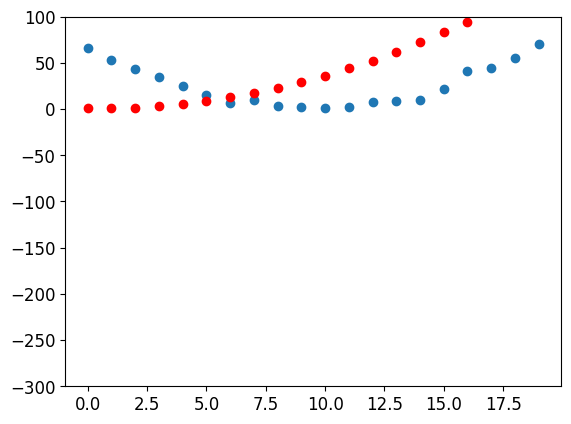

In [210]:
show_preds(preds)

In [213]:
params = orig_params.detach().requires_grad_()

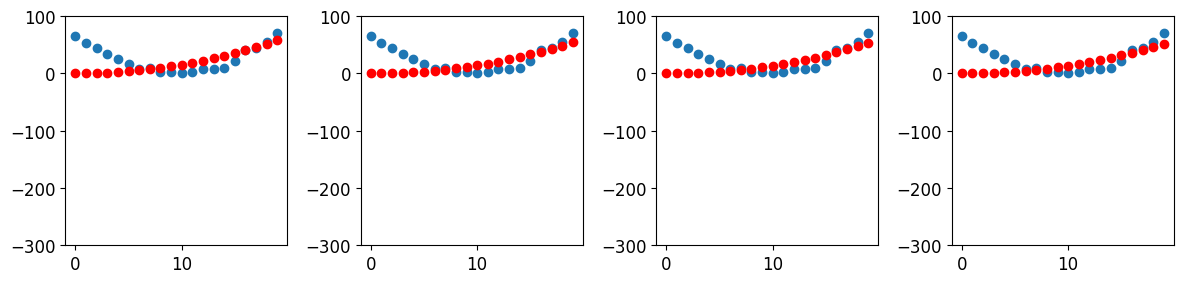

In [214]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [286]:
torch.tensor([ 0.1943, -0.7342,  0.0796, -10])

tensor([  0.1943,  -0.7342,   0.0796, -10.0000])

In [287]:
params2 = torch.tensor([ 0.1943, -0.7342,  0.0796, -10]).requires_grad_()
orig_params2 = params2.clone()

In [283]:
params2

tensor([ 0.1943, -0.7342,  0.0796, -0.3888], requires_grad=True)

In [279]:
lr = 1e-5

In [280]:


def mse(preds, targets): return ((preds-targets)**2).mean()

def f2(x, params):
  a,b,c,d = params
  return a*(x+d)**2+(x+d)*b+c
def apply_step2(params, prn=True):
    preds = f2(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

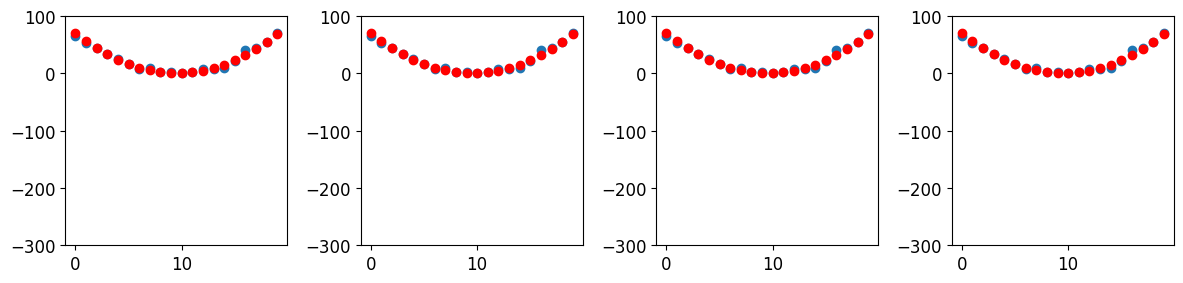

In [290]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step2(params2, False), ax)
plt.tight_layout()

In [289]:

for i in range(1000): apply_step2(params2)

508.66046142578125
475.20953369140625
444.4163513183594
416.068359375
389.9697570800781
365.9405822753906
343.81500244140625
323.4407043457031
304.6771545410156
287.3954162597656
271.4765930175781
256.8115539550781
243.2997283935547
230.84848022460938
219.3729248046875
208.7946319580078
199.04176330566406
190.04795837402344
181.7523956298828
174.09902954101562
167.0363006591797
160.51683044433594
154.49696350097656
148.93666076660156
143.7990264892578
139.0501708984375
134.658935546875
130.5966033935547
126.8367691040039
123.3553237915039
120.1297607421875
117.1396484375
114.36614990234375
111.79188537597656
109.4009017944336
107.17863464355469
105.1114273071289
103.1869888305664
101.39396667480469
99.72177124023438
98.16084289550781
96.70223236083984
95.33782196044922
94.06018829345703
92.86227416992188
91.73792266845703
90.68123626708984
89.68679809570312
88.74977111816406
87.86553955078125
87.03001403808594
86.23934173583984
85.48994445800781
84.77864074707031
84.10240936279297
83.4